## Number of Commits for each Student 

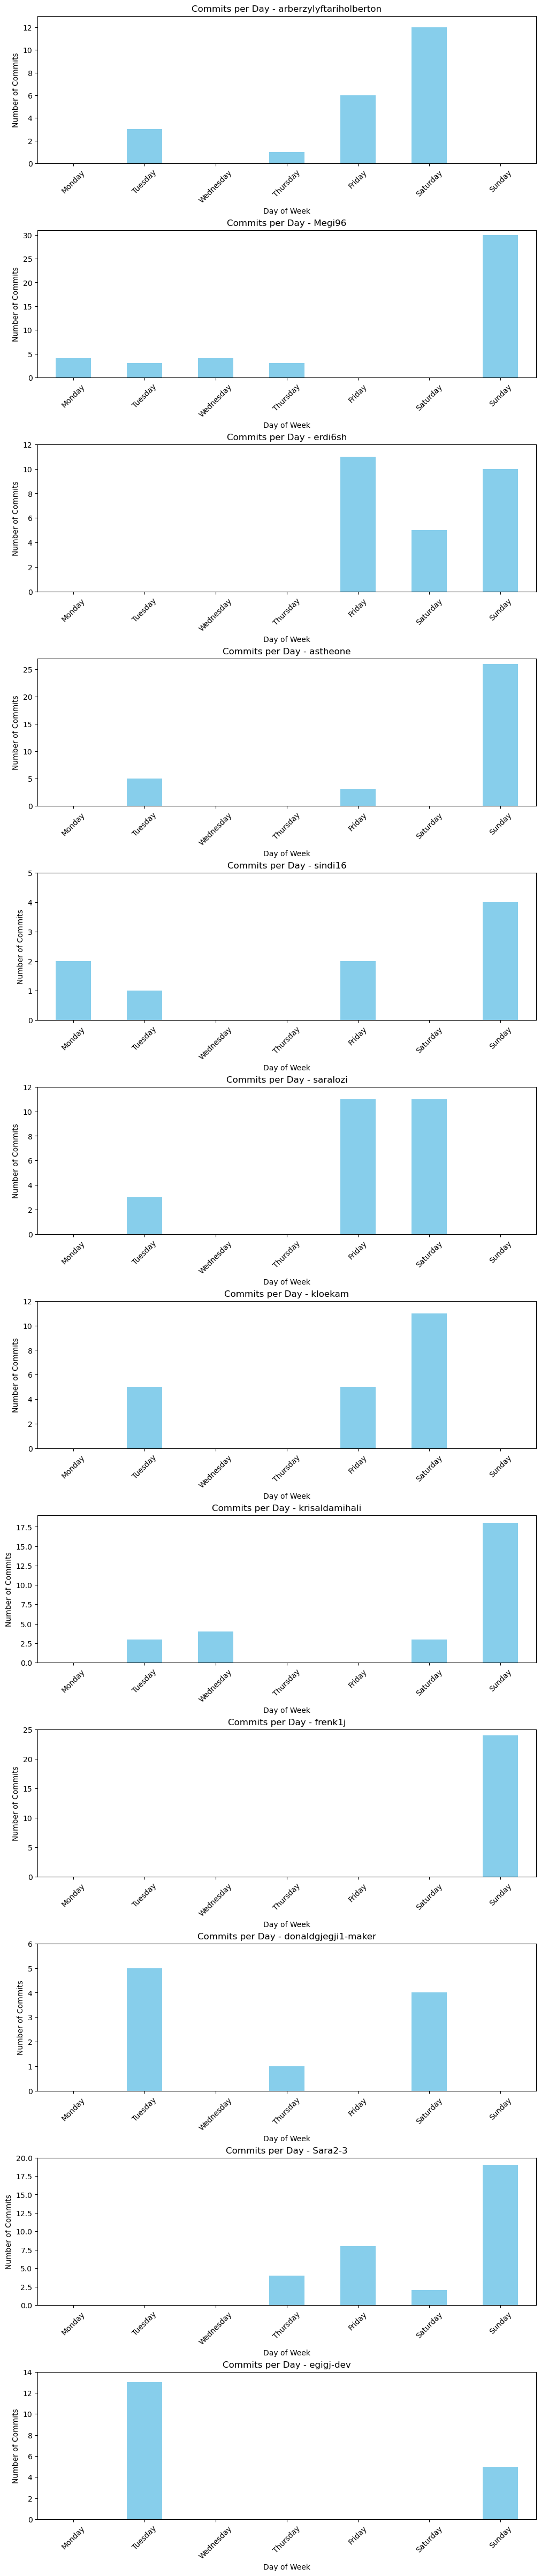

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("student_commits.csv")

# Ensure datetime is parsed
df['datetime'] = pd.to_datetime(df['datetime'])
df['day'] = df['datetime'].dt.day_name()

# Order of days
days_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# ---------------------------
# Per-student commits per day
# ---------------------------
students = df['author'].unique()

# Create a subplot grid: rows = number of students (adjust if too many)
n = len(students)
fig, axes = plt.subplots(n, 1, figsize=(10, 4*n), constrained_layout=True)

if n == 1:
    axes = [axes]  # ensure it's iterable

for ax, student in zip(axes, students):
    student_df = df[df['author'] == student]
    commits_per_day = student_df['day'].value_counts().reindex(days_order, fill_value=0)
    commits_per_day.plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f"Commits per Day - {student}")
    ax.set_xlabel("Day of Week")
    ax.set_ylabel("Number of Commits")
    ax.set_ylim(0, commits_per_day.max() + 1)
    ax.tick_params(axis='x', rotation=45)

plt.show()

## Count of Students who Committed each Day

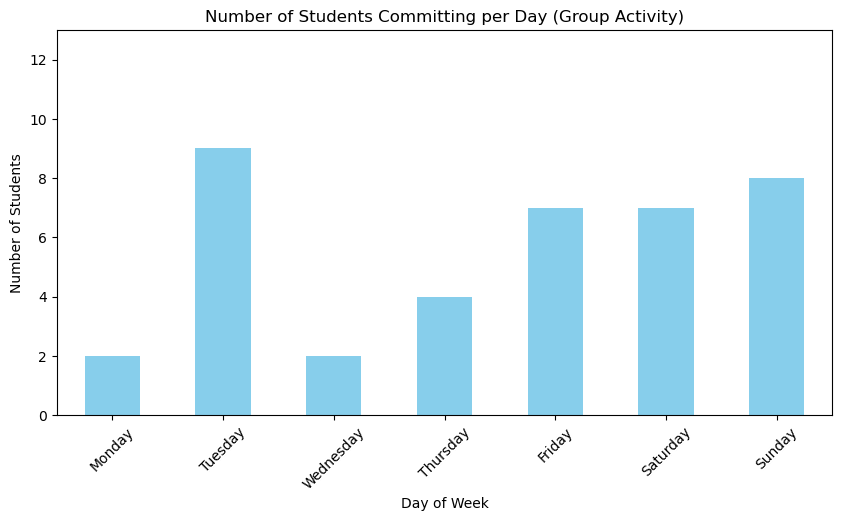

In [4]:
# Count how many unique students committed each day
students_per_day = df.groupby('day')['author'].nunique().reindex(days_order, fill_value=0)

plt.figure(figsize=(10,5))
students_per_day.plot(kind='bar', color='skyblue')
plt.title("Number of Students Committing per Day (Group Activity)")
plt.xlabel("Day of Week")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.ylim(0, len(students) + 1)
plt.show()

## Total Commits per Day

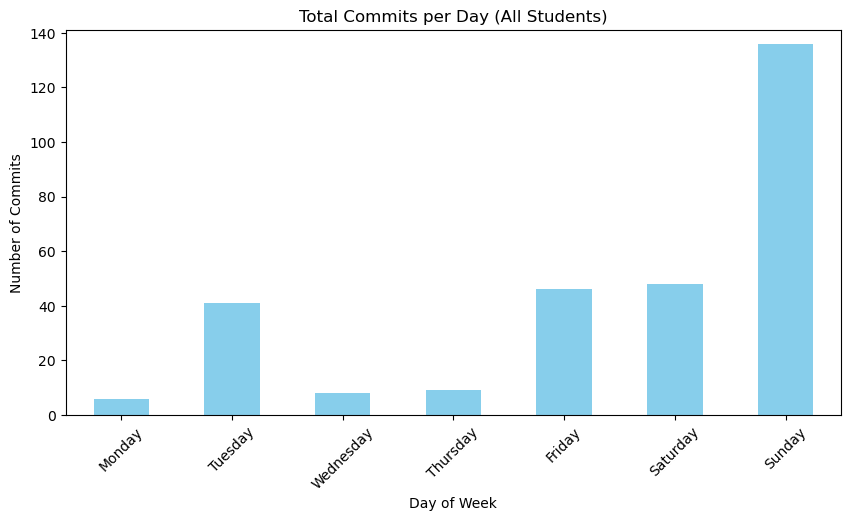

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("student_commits.csv")

# Ensure datetime is parsed
df['datetime'] = pd.to_datetime(df['datetime'])
df['day'] = df['datetime'].dt.day_name()

# Order of days
days_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# Count total commits per day
commits_per_day = df['day'].value_counts().reindex(days_order, fill_value=0)

# Plot
plt.figure(figsize=(10,5))
commits_per_day.plot(kind='bar', color='skyblue')
plt.title("Total Commits per Day (All Students)")
plt.xlabel("Day of Week")
plt.ylabel("Number of Commits")
plt.xticks(rotation=45)
plt.ylim(0, commits_per_day.max() + 5)
plt.show()


## Commit Each Day. 